# GTC spectrum plots

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.ndimage import median_filter as mf
from itertools import chain
from src.core import *

sb.set_context('paper')

In [12]:
wlt, spt = loadtxt('data/spectra/N1_GTC_spectra_target.txt').T
wlr, spr = loadtxt('data/spectra/N1_GTC_spectra_reference.txt').T

wlt, wlr = 0.1*wlt, 0.1*wlr

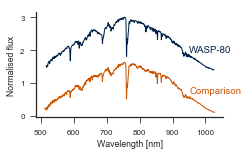

In [14]:
with sb.axes_style('ticks'):
    fig, ax = subplots(figsize=(AAOCW, 0.65*AAOCW))
    ax.plot(wlt, N(spt) + 1.3, lw=1)
    ax.plot(wlr, N(spr), lw=1)
    ax.text(950, 1.95, 'WASP-80', color=cp[0])
    ax.text(950, 0.7, 'Comparison', color=cp[1])
setp(ax, ylabel = 'Normalised flux', xlabel='Wavelength [nm]')
sb.despine(fig)
fig.tight_layout()
fig.savefig('plots/pub_spectra.pdf')

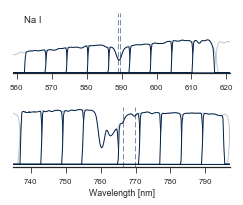

In [60]:
with sb.axes_style('ticks'):
    fig, ax = subplots(2, 1, figsize=(AAOCW, 0.85*AAOCW))
    [ax[0].plot(wlt, f(wlt)*N(spt), lw=1, c=c_ob, alpha=0.25) for f in pb_filters_nb]
    [ax[0].fill_between(wlt, f(wlt)*N(spt), lw=1, edgecolor=c_ob, facecolor='w', zorder=100) for f in pb_filters_na]
    ax[0].text(0.05, 0.95, 'Na I', va='top', transform=ax[0].transAxes, bbox=dict(facecolor='w', edgecolor='w'))
    [ax[1].plot(wlt, f(wlt)*N(spt), lw=1, c=c_ob, alpha=0.25) for f in pb_filters_nb]
    [ax[1].fill_between(wlt, f(wlt)*N(spt), lw=1, edgecolor=c_ob, facecolor='w', zorder=100) for f in pb_filters_k]
    ax[1].text(0.05, 0.95, 'K I', va='top', transform=ax[1].transAxes, bbox=dict(facecolor='w', edgecolor='w'))
    [[a.axvline(l, lw=1, c=c_ob, ls='--', alpha=0.5, zorder=101) for l in chain(wlc_k, wlc_na)] for a in ax]
    
setp(ax[0], yticks=[], xlim=(559,621), ylim=(0,1.8))
setp(ax[1], xlabel='Wavelength [nm]', yticks=[], xlim=(735,797))
sb.despine(fig, left=True)
fig.tight_layout()
fig.savefig('plots/pub_pb_na_and_k.pdf')

In [31]:
dfs = [pd.merge(pd.read_hdf('data/aux.h5','night%i'%night),
              pd.read_hdf('results/gtc_light_curves_gc.h5','night%i'%night),
              left_index=True, right_index=True) for night in [1,2]]
cols =  [[c for c in df.columns if 'relative_nb' in c] for df in dfs]
cref = [[c for c in df.columns if 'comparison_nb' in c] for df in dfs]
ctrg = [[c for c in df.columns if 'target_nb' in c] for df in dfs]

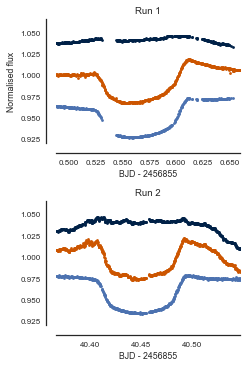

In [67]:
with sb.axes_style('ticks'):
    fig, ax = subplots(2, 1, figsize=(AAOCW, 1.5*AAOCW), sharey=True)
    for inight,df in enumerate(dfs):
        time = df.bjd_aux.values - 2456855
        fref = N(df[cref[inight]].mean(1).values)
        mref = (abs(fref-mf(fref, 7)) < 0.001)
        if inight == 0:
            mref &= fref > 0.9855
        ftrg = N(df[ctrg[inight]].mean(1).values)
        mtrg = abs(ftrg-mf(ftrg, 5)) < 0.005
        mtrg= ones(ftrg.size, bool)
        ax[inight].plot(time, where(mref, fref+0.04, nan), '.')
        ax[inight].plot(time, where(mtrg, ftrg, nan), '.')
        ax[inight].plot(time, where(mtrg&mref, ftrg/fref-0.04, nan), '.')
        setp(ax[inight], xlim=time[[0,-1]])
        ax[inight].set_title('Run %i'%(inight+1))
setp(ax, ylim=(0.92,1.065), xlabel='BJD - 2456855')
setp(ax[0], ylabel='Normalised flux')
sb.despine(offset=10)
fig.tight_layout()
fig.savefig('plots/pub_white_lcs.pdf')

---

<center> &copy; 2017 Hannu Parviainen </center>